## EDA on Raw Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
excel_path = "../data/raw/Voter List - Ward 21 and 22.xls"
df = pd.read_excel(excel_path)

In [3]:
df.head()

,Last Name,First Name,MI,Title,DOB,Occupation,Street .,Sffx,Street Name,Apt .,...,Mail Apt .,Mail City,Mail State,Mail Zip,Party,VS,Ward,Precinct,Reg Date,Res ID
0,ZAKUTA,JANNA,NaN,NaN,1939-02-04,UNKNOWN,142,NaN,KENRICK ST,11,...,NaN,NaN,NaN,NaN,U,I,22,8,1996-05-02,02ZJA0439000
1,MARTELLO,KATHRYN,EMILY,NaN,1999-07-23,UNKNOWN,142,NaN,KENRICK ST,11,...,NaN,NaN,NaN,NaN,D,A,22,8,2025-02-26,07MKN2399001
2,MCCARTHY,KRISTEN,ERIN,NaN,1993-03-17,RESEACHER,144,NaN,KENRICK ST,11,...,NaN,NaN,NaN,NaN,D,A,22,8,2022-05-12,03MKN1793000
3,BEAUDOIN,CHRISTOPHER,J,NaN,1995-01-02,SECURITY,144,NaN,KENRICK ST,11,...,NaN,NaN,NaN,NaN,D,A,22,8,2017-11-10,01BCR0295000
4,BATTAGLIA,DOMINIC,ORAZIO,NaN,1995-11-05,UNKNOWN,185,NaN,CHESTNUT HILL AVE,11,...,NaN,NaN,NaN,NaN,R,A,22,9,2018-11-08,11BDC0595000


In [4]:
#List of columns and each type of data found in each column
col_names = df.columns
col_types = df.dtypes
#print the col and corresponding data type
for col, dtype in zip(col_names, col_types):
    print(f"{col}: {dtype}")

Last Name: object
First Name: object
MI: object
Title: object
DOB: datetime64[ns]
Occupation: object
Street .: int64
Sffx: object
Street Name: object
Apt .: object
Zip: int64
Mail Address: object
Mail Apt .: object
Mail City: object
Mail State: object
Mail Zip: object
Party: object
VS: object
Ward: int64
Precinct: int64
Reg Date: datetime64[ns]
Res ID: object


In [5]:
rows,cols = df.shape
print(f"There are {rows} rows and {cols} columns in the dataset")

There are 43759 rows and 22 columns in the dataset


Missing values per column (including 'UNKNOWN'):
Last Name           2
First Name          0
MI              13086
Title           43061
DOB                 0
Occupation      21695
Street .            0
Sffx            43586
Street Name         0
Apt .           11614
Zip                 0
Mail Address    40318
Mail Apt .      41816
Mail City       40318
Mail State      40318
Mail Zip        40318
Party               0
VS                  0
Ward                0
Precinct            0
Reg Date            0
Res ID              0
dtype: int64


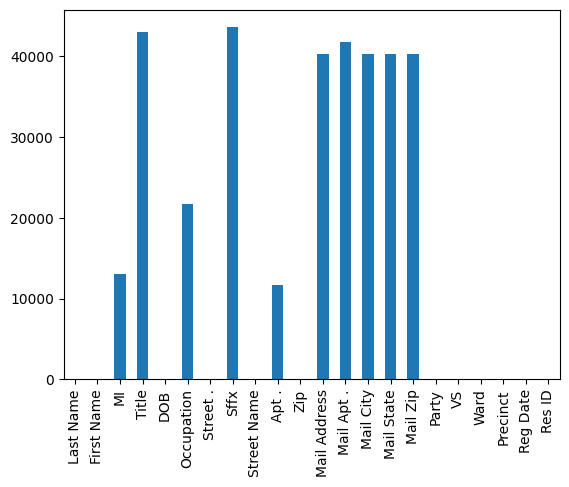

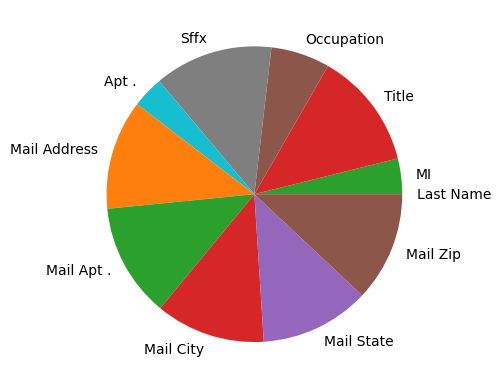

In [6]:
# Replace 'UNKNOWN' with pd.NA before counting NaNs
df_clean = df.replace('UNKNOWN', pd.NA)

# Count missing values (including 'UNKNOWN' now as NA) per column
nan_counts = df_clean.isna().sum()
print("Missing values per column (including 'UNKNOWN'):")
print(nan_counts)
#plot it as a bar chart
nan_counts.plot(kind='bar')
plt.show()
#plot it as a pie chart
nan_counts.plot(kind='pie')
plt.show()

In [7]:
# List of columns to check for unique values
cols_to_check = [
    "Party", "VS", "Ward", "Precinct", "Reg Date", "Res ID",
    "Street .", "Sffx", "Street Name", "Apt .", "Zip"
]

# Print the number of unique values in each column
for col in cols_to_check:
    unique_count = df[col].nunique(dropna=True)
    print(f"{col}: {unique_count} unique values")


Party: 25 unique values
VS: 2 unique values
Ward: 2 unique values
Precinct: 16 unique values
Reg Date: 7164 unique values
Res ID: 43759 unique values
Street .: 898 unique values
Sffx: 12 unique values
Street Name: 389 unique values
Apt .: 1584 unique values
Zip: 7 unique values


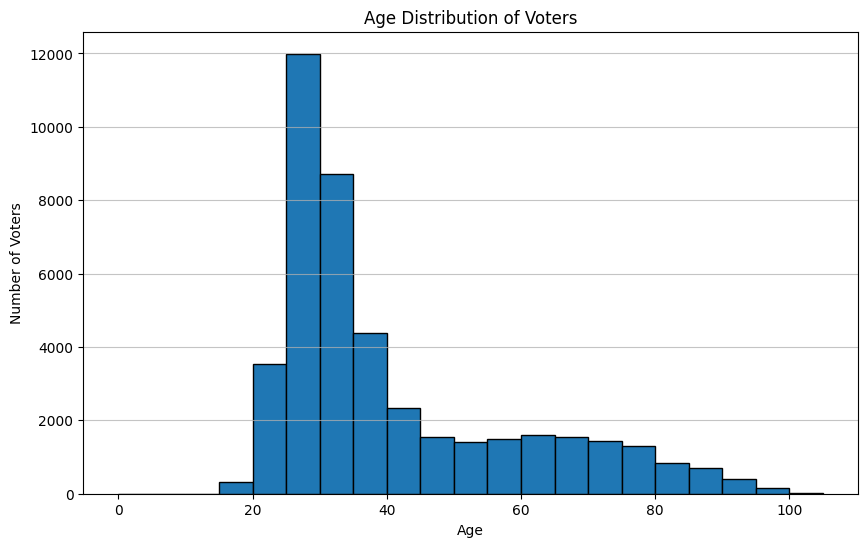

In [8]:
import numpy as np

# Ensure DOB is in datetime format
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')

# Calculate age as of today
today = pd.Timestamp('today').normalize()
df['Age'] = (today - df['DOB']).dt.days // 365

# Drop rows where Age could not be calculated (DOB missing or invalid)
age_data = df['Age'].dropna().astype(int)

# Plot age distribution
plt.figure(figsize=(10,6))
plt.hist(age_data, bins=range(0, 110, 5), edgecolor='black')
plt.title('Age Distribution of Voters')
plt.xlabel('Age')
plt.ylabel('Number of Voters')
plt.grid(axis='y', alpha=0.75)
plt.show()

- **ResID** is the unique identifier.
- **Columns of interest:**
    - Res ID
    - Street .
    - Sffx
    - Street Name
    - Apt .
    - Zip
    - Ward
    - Precinct
    - DOB
    - Occupation
    - Street Name
    - Apt .

The cleaned version of this dataset will be the one will containing all this cols 

## EDA on cleaned Dataset

In [9]:
# Comprehensive EDA for ABCDC Affordable Senior Housing Initiative
# Focus: Identifying elderly residents (62+) in Allston-Brighton for housing outreach

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("EDA Environment Setup Complete")
print("=" * 50)


EDA Environment Setup Complete


In [10]:
# Load the cleaned voter list dataset
df_clean = pd.read_csv("../data/processed/voter_list_cleaned.csv")

print("Cleaned Dataset Overview:")
print(f"Shape: {df_clean.shape}")
print(f"Columns: {list(df_clean.columns)}")
print("\nFirst few rows:")
df_clean.head()


Cleaned Dataset Overview:
Shape: (43759, 10)
Columns: ['Res ID', 'Street .', 'Sffx', 'Street Name', 'Apt .', 'Zip', 'Ward', 'Precinct', 'DOB', 'Occupation']

First few rows:


,Res ID,Street .,Sffx,Street Name,Apt .,Zip,Ward,Precinct,DOB,Occupation
0,02ZJA0439000,142,NaN,KENRICK ST,11,2135,22,8,1939-02-04,UNKNOWN
1,07MKN2399001,142,NaN,KENRICK ST,11,2135,22,8,1999-07-23,UNKNOWN
2,03MKN1793000,144,NaN,KENRICK ST,11,2135,22,8,1993-03-17,RESEACHER
3,01BCR0295000,144,NaN,KENRICK ST,11,2135,22,8,1995-01-02,SECURITY
4,11BDC0595000,185,NaN,CHESTNUT HILL AVE,11,2135,22,9,1995-11-05,UNKNOWN


In [11]:
# Data quality assessment
print("DATA QUALITY ASSESSMENT")
print("=" * 30)

# Check data types and missing values
print("Data Types:")
print(df_clean.dtypes)
print("\nMissing Values:")
missing_data = df_clean.isnull().sum()
print(missing_data[missing_data > 0])

# Convert DOB to datetime and calculate age
df_clean['DOB'] = pd.to_datetime(df_clean['DOB'])
today = pd.Timestamp('today').normalize()
df_clean['Age'] = (today - df_clean['DOB']).dt.days // 365

print(f"\nAge calculation complete. Age range: {df_clean['Age'].min()} - {df_clean['Age'].max()}")
print(f"Total records: {len(df_clean)}")
print(f"Records with valid age: {df_clean['Age'].notna().sum()}")


DATA QUALITY ASSESSMENT
Data Types:
Res ID         object
Street .        int64
Sffx           object
Street Name    object
Apt .          object
Zip             int64
Ward            int64
Precinct        int64
DOB            object
Occupation     object
dtype: object

Missing Values:
Sffx          43586
Apt .         11614
Occupation       72
dtype: int64

Age calculation complete. Age range: 18 - 106
Total records: 43759
Records with valid age: 43759


In [12]:
# ELDERLY POPULATION ANALYSIS (62+ years old)
print("ELDERLY POPULATION ANALYSIS")
print("=" * 35)

# Create elderly subset (62+ years old)
elderly_threshold = 62
df_elderly = df_clean[df_clean['Age'] >= elderly_threshold].copy()

print(f"Total population: {len(df_clean):,}")
print(f"Elderly population (62+): {len(df_elderly):,}")
print(f"Elderly percentage: {len(df_elderly)/len(df_clean)*100:.1f}%")

# Age distribution analysis
print(f"\nElderly age statistics:")
print(f"Mean age: {df_elderly['Age'].mean():.1f}")
print(f"Median age: {df_elderly['Age'].median():.1f}")
print(f"Age range: {df_elderly['Age'].min()} - {df_elderly['Age'].max()}")

# Age group breakdown
age_groups = {
    '62-69': len(df_elderly[(df_elderly['Age'] >= 62) & (df_elderly['Age'] <= 69)]),
    '70-79': len(df_elderly[(df_elderly['Age'] >= 70) & (df_elderly['Age'] <= 79)]),
    '80-89': len(df_elderly[(df_elderly['Age'] >= 80) & (df_elderly['Age'] <= 89)]),
    '90+': len(df_elderly[df_elderly['Age'] >= 90])
}

print(f"\nAge group distribution:")
for group, count in age_groups.items():
    percentage = count/len(df_elderly)*100
    print(f"{group}: {count:,} ({percentage:.1f}%)")


ELDERLY POPULATION ANALYSIS
Total population: 43,759
Elderly population (62+): 7,384
Elderly percentage: 16.9%

Elderly age statistics:
Mean age: 74.9
Median age: 74.0
Age range: 62 - 106

Age group distribution:
62-69: 2,531 (34.3%)
70-79: 2,720 (36.8%)
80-89: 1,538 (20.8%)
90+: 595 (8.1%)


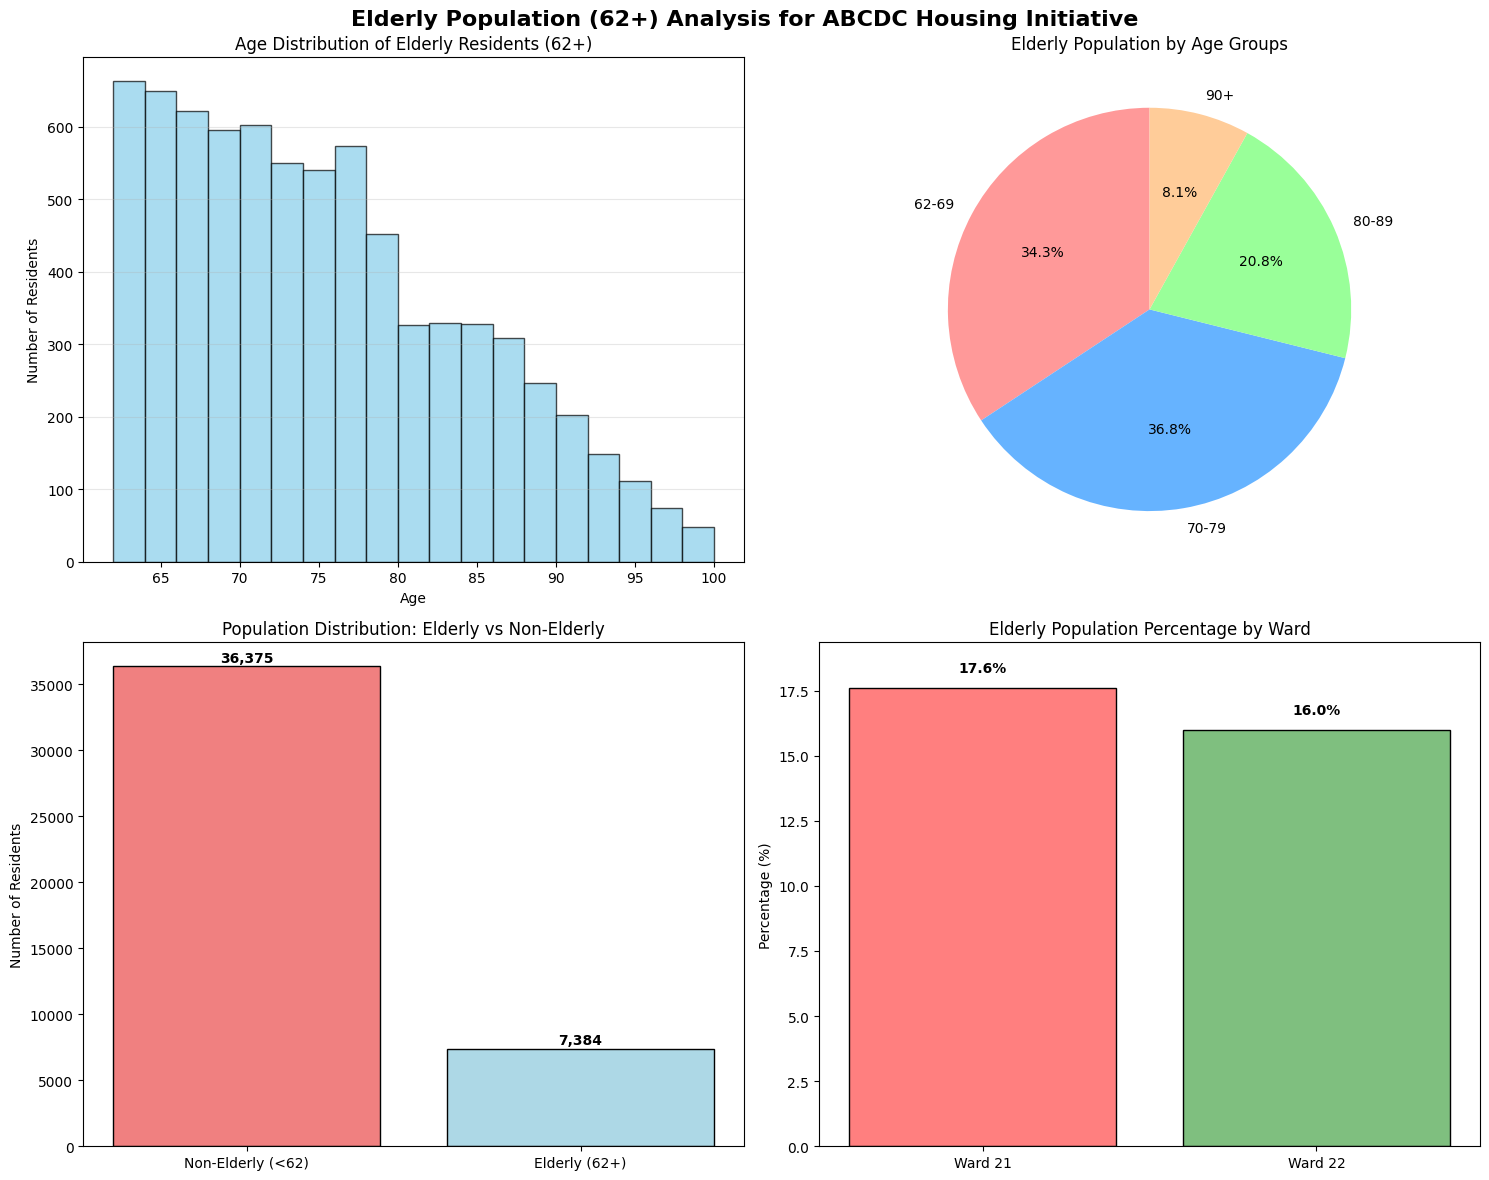


Key Insights:
• 7,384 elderly residents (62+) identified for potential housing outreach
• Elderly population represents 16.9% of total registered voters
• Ward 21: 17.6% elderly, Ward 22: 16.0% elderly


In [13]:
# Visualize age distribution for elderly population
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Elderly Population (62+) Analysis for ABCDC Housing Initiative', fontsize=16, fontweight='bold')

# 1. Age distribution histogram
axes[0,0].hist(df_elderly['Age'], bins=range(62, 101, 2), edgecolor='black', alpha=0.7, color='skyblue')
axes[0,0].set_title('Age Distribution of Elderly Residents (62+)')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Number of Residents')
axes[0,0].grid(axis='y', alpha=0.3)

# 2. Age group pie chart
age_group_labels = list(age_groups.keys())
age_group_counts = list(age_groups.values())
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
axes[0,1].pie(age_group_counts, labels=age_group_labels, autopct='%1.1f%%', colors=colors, startangle=90)
axes[0,1].set_title('Elderly Population by Age Groups')

# 3. Comparison: Total vs Elderly population
total_pop = len(df_clean)
elderly_pop = len(df_elderly)
non_elderly = total_pop - elderly_pop

categories = ['Non-Elderly (<62)', 'Elderly (62+)']
counts = [non_elderly, elderly_pop]
colors = ['lightcoral', 'lightblue']

bars = axes[1,0].bar(categories, counts, color=colors, edgecolor='black')
axes[1,0].set_title('Population Distribution: Elderly vs Non-Elderly')
axes[1,0].set_ylabel('Number of Residents')

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 100,
                   f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 4. Elderly percentage by ward
ward_elderly = df_elderly.groupby('Ward').size()
ward_total = df_clean.groupby('Ward').size()
ward_elderly_pct = (ward_elderly / ward_total * 100).round(1)

ward_names = [f'Ward {w}' for w in ward_elderly_pct.index]
bars = axes[1,1].bar(ward_names, ward_elderly_pct.values, color=['#ff7f7f', '#7fbf7f'], edgecolor='black')
axes[1,1].set_title('Elderly Population Percentage by Ward')
axes[1,1].set_ylabel('Percentage (%)')
axes[1,1].set_ylim(0, max(ward_elderly_pct.values) * 1.1)

# Add value labels on bars
for bar, pct in zip(bars, ward_elderly_pct.values):
    height = bar.get_height()
    axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                   f'{pct}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nKey Insights:")
print(f"• {elderly_pop:,} elderly residents (62+) identified for potential housing outreach")
print(f"• Elderly population represents {elderly_pop/total_pop*100:.1f}% of total registered voters")
print(f"• Ward 21: {ward_elderly_pct[21]:.1f}% elderly, Ward 22: {ward_elderly_pct[22]:.1f}% elderly")


In [14]:
# GEOGRAPHIC ANALYSIS - Ward and Precinct Distribution
print("GEOGRAPHIC ANALYSIS")
print("=" * 25)

# Ward-level analysis
print("WARD-LEVEL ANALYSIS:")
ward_analysis = df_elderly.groupby('Ward').agg({
    'Res ID': 'count',
    'Age': ['mean', 'median', 'min', 'max']
}).round(1)

ward_analysis.columns = ['Elderly_Count', 'Mean_Age', 'Median_Age', 'Min_Age', 'Max_Age']
print(ward_analysis)

# Precinct-level analysis
print(f"\nPRECINCT-LEVEL ANALYSIS:")
precinct_analysis = df_elderly.groupby(['Ward', 'Precinct']).agg({
    'Res ID': 'count',
    'Age': 'mean'
}).round(1)

precinct_analysis.columns = ['Elderly_Count', 'Mean_Age']
precinct_analysis = precinct_analysis.sort_values('Elderly_Count', ascending=False)
print("Top 10 precincts by elderly population:")
print(precinct_analysis.head(10))

# Street-level analysis for high-density elderly areas
print(f"\nSTREET-LEVEL ANALYSIS:")
# Create full address for better analysis
df_elderly['Full_Address'] = df_elderly['Street .'].astype(str) + ' ' + df_elderly['Street Name'].fillna('') + ' ' + df_elderly['Apt .'].fillna('')

street_analysis = df_elderly.groupby(['Street Name', 'Ward']).agg({
    'Res ID': 'count',
    'Age': 'mean'
}).round(1)

street_analysis.columns = ['Elderly_Count', 'Mean_Age']
street_analysis = street_analysis.sort_values('Elderly_Count', ascending=False)
print("Top 15 streets by elderly population:")
print(street_analysis.head(15))


GEOGRAPHIC ANALYSIS
WARD-LEVEL ANALYSIS:
      Elderly_Count  Mean_Age  Median_Age  Min_Age  Max_Age
Ward                                                       
21             4192      76.2        75.0       62      106
22             3192      73.1        72.0       62      103

PRECINCT-LEVEL ANALYSIS:
Top 10 precincts by elderly population:
               Elderly_Count  Mean_Age
Ward Precinct                         
21   13                  840      79.5
     16                  540      77.7
     12                  498      78.1
22   2                   421      73.3
21   10                  413      75.9
     9                   351      73.9
22   8                   304      75.3
21   7                   281      72.5
22   12                  263      72.0
     4                   257      73.4

STREET-LEVEL ANALYSIS:
Top 15 streets by elderly population:
                        Elderly_Count  Mean_Age
Street Name       Ward                         
COMMONWEALTH AVE  21       

In [20]:
# Save the analysis results to CSV files for further use or sharing

# Save ward-level analysis
ward_analysis.to_csv('ward_elderly_analysis.csv')

# Save precinct-level analysis
precinct_analysis.to_csv('precinct_elderly_analysis.csv')

# Save street-level analysis
street_analysis.to_csv('street_elderly_analysis.csv')

print("Analysis results saved to CSV files: 'ward_elderly_analysis.csv', 'precinct_elderly_analysis.csv', 'street_elderly_analysis.csv'")


Analysis results saved to CSV files: 'ward_elderly_analysis.csv', 'precinct_elderly_analysis.csv', 'street_elderly_analysis.csv'


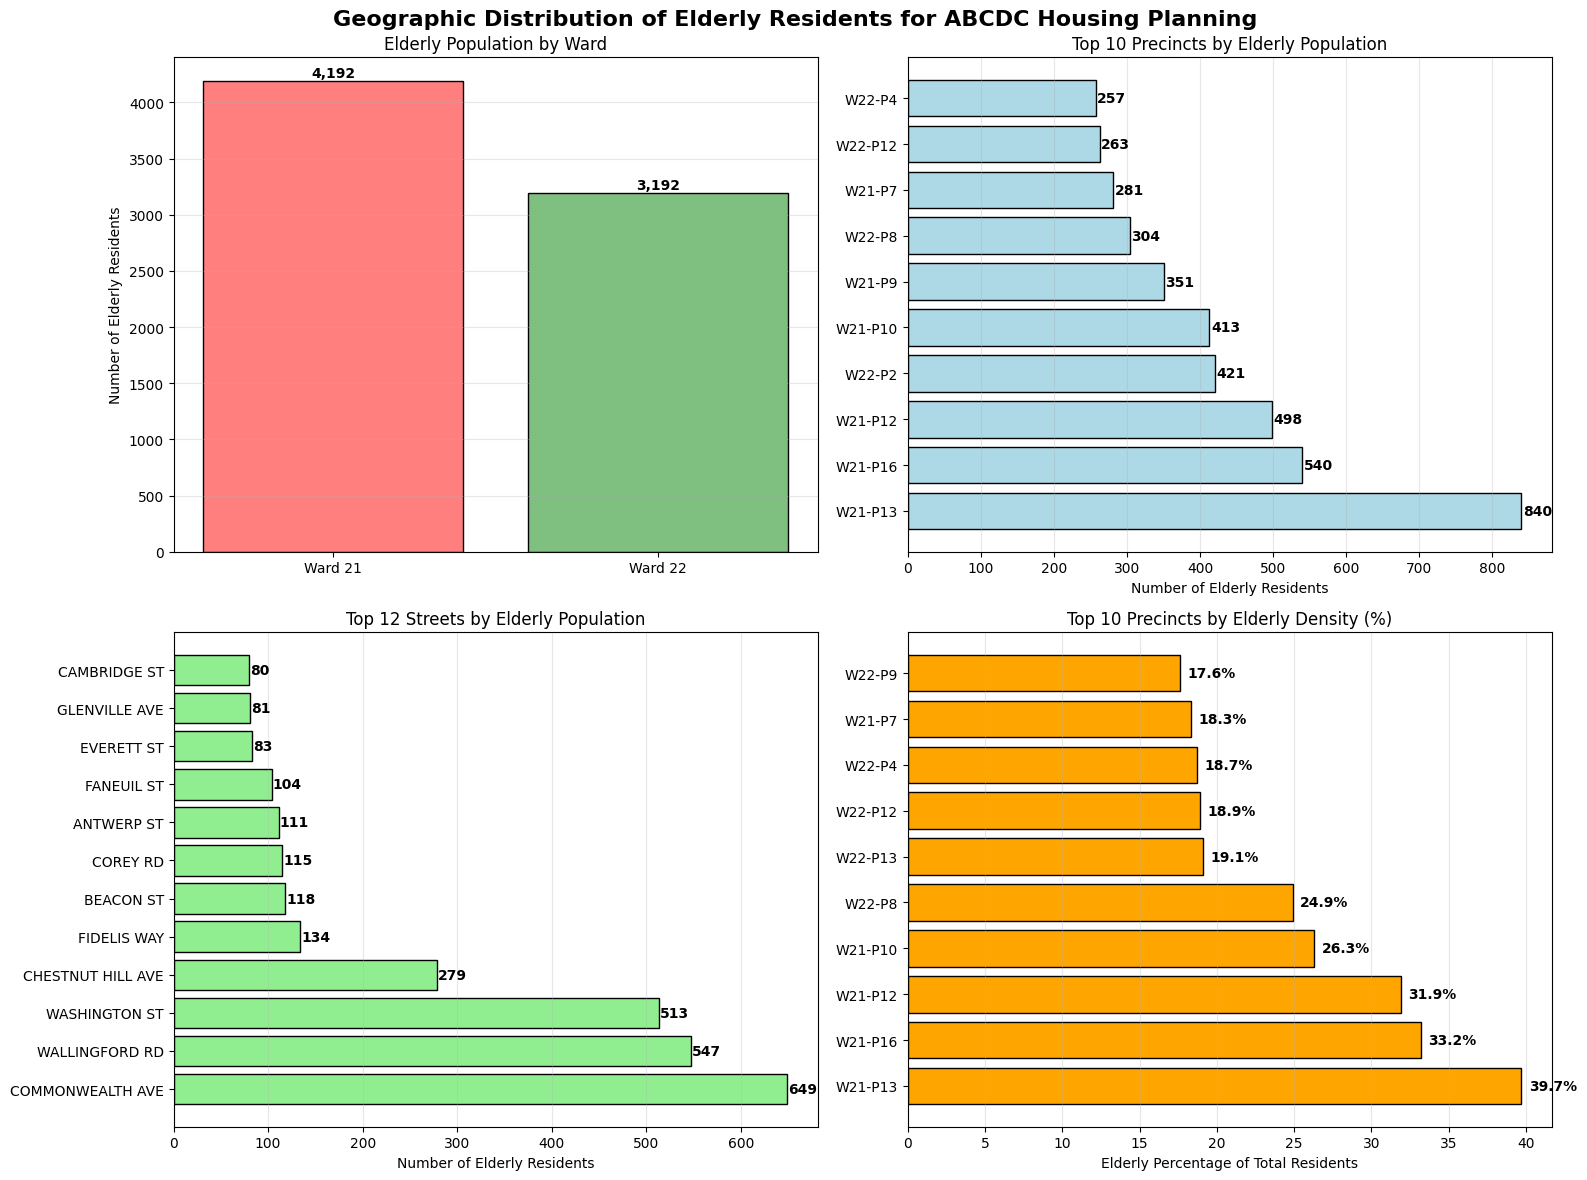


Geographic Insights for ABCDC:
• Ward 21: 4,192 elderly residents
• Ward 22: 3,192 elderly residents
• Highest elderly density precinct: W21-P13 with 39.7% elderly
• Top street for elderly outreach: COMMONWEALTH AVE with 649 elderly residents


In [15]:
# Geographic visualizations for ABCDC planning
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Geographic Distribution of Elderly Residents for ABCDC Housing Planning', fontsize=16, fontweight='bold')

# 1. Elderly population by ward
ward_counts = df_elderly.groupby('Ward').size()
ward_names = [f'Ward {w}' for w in ward_counts.index]
colors = ['#ff7f7f', '#7fbf7f']

bars1 = axes[0,0].bar(ward_names, ward_counts.values, color=colors, edgecolor='black')
axes[0,0].set_title('Elderly Population by Ward')
axes[0,0].set_ylabel('Number of Elderly Residents')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, count in zip(bars1, ward_counts.values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 2. Top precincts by elderly population
top_precincts = precinct_analysis.head(10)
precinct_labels = [f'W{w}-P{p}' for w, p in top_precincts.index]

bars2 = axes[0,1].barh(precinct_labels, top_precincts['Elderly_Count'], color='lightblue', edgecolor='black')
axes[0,1].set_title('Top 10 Precincts by Elderly Population')
axes[0,1].set_xlabel('Number of Elderly Residents')
axes[0,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars2, top_precincts['Elderly_Count'])):
    width = bar.get_width()
    axes[0,1].text(width + 2, bar.get_y() + bar.get_height()/2,
                   f'{count:.0f}', ha='left', va='center', fontweight='bold')

# 3. Top streets by elderly population
top_streets = street_analysis.head(12)
street_labels = [f'{street[:20]}...' if len(street) > 20 else street for street in top_streets.index.get_level_values(0)]

bars3 = axes[1,0].barh(street_labels, top_streets['Elderly_Count'], color='lightgreen', edgecolor='black')
axes[1,0].set_title('Top 12 Streets by Elderly Population')
axes[1,0].set_xlabel('Number of Elderly Residents')
axes[1,0].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, count) in enumerate(zip(bars3, top_streets['Elderly_Count'])):
    width = bar.get_width()
    axes[1,0].text(width + 1, bar.get_y() + bar.get_height()/2,
                   f'{count:.0f}', ha='left', va='center', fontweight='bold')

# 4. Elderly density by precinct (elderly per total residents)
precinct_total = df_clean.groupby(['Ward', 'Precinct']).size()
precinct_elderly = df_elderly.groupby(['Ward', 'Precinct']).size()
precinct_density = (precinct_elderly / precinct_total * 100).round(1)
precinct_density = precinct_density.sort_values(ascending=False).head(10)

density_labels = [f'W{w}-P{p}' for w, p in precinct_density.index]

bars4 = axes[1,1].barh(density_labels, precinct_density.values, color='orange', edgecolor='black')
axes[1,1].set_title('Top 10 Precincts by Elderly Density (%)')
axes[1,1].set_xlabel('Elderly Percentage of Total Residents')
axes[1,1].grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, pct) in enumerate(zip(bars4, precinct_density.values)):
    width = bar.get_width()
    axes[1,1].text(width + 0.5, bar.get_y() + bar.get_height()/2,
                   f'{pct}%', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nGeographic Insights for ABCDC:")
print(f"• Ward 21: {ward_counts[21]:,} elderly residents")
print(f"• Ward 22: {ward_counts[22]:,} elderly residents")
print(f"• Highest elderly density precinct: {density_labels[0]} with {precinct_density.iloc[0]}% elderly")
print(f"• Top street for elderly outreach: {street_analysis.index[0][0]} with {street_analysis.iloc[0]['Elderly_Count']:.0f} elderly residents")


In [16]:
# OCCUPATION ANALYSIS
print("OCCUPATION ANALYSIS")
print("=" * 25)

# Analyze occupation patterns
print("OCCUPATION DISTRIBUTION:")
occupation_analysis = df_elderly['Occupation'].value_counts()
print(f"Total elderly with occupation data: {df_elderly['Occupation'].notna().sum():,}")
print(f"Elderly with 'UNKNOWN' occupation: {(df_elderly['Occupation'] == 'UNKNOWN').sum():,}")
print(f"Elderly with missing occupation: {df_elderly['Occupation'].isna().sum():,}")

# Categorize occupations
def categorize_occupation(occ):
    if pd.isna(occ) or occ == 'UNKNOWN':
        return 'Unknown/Retired'
    occ_lower = str(occ).lower()
    
    # Professional/Stable income indicators
    if any(word in occ_lower for word in ['teacher', 'professor', 'engineer', 'doctor', 'nurse', 'lawyer', 'manager', 'director']):
        return 'Professional/Stable'
    # Service sector
    elif any(word in occ_lower for word in ['service', 'retail', 'sales', 'clerk', 'assistant']):
        return 'Service Sector'
    # Healthcare
    elif any(word in occ_lower for word in ['health', 'medical', 'care', 'therapist']):
        return 'Healthcare'
    # Government/Public sector
    elif any(word in occ_lower for word in ['government', 'public', 'city', 'state', 'federal']):
        return 'Government/Public'
    # Construction/Trades
    elif any(word in occ_lower for word in ['construction', 'contractor', 'electrician', 'plumber', 'mechanic']):
        return 'Construction/Trades'
    # Other
    else:
        return 'Other'

df_elderly['Occupation_Category'] = df_elderly['Occupation'].apply(categorize_occupation)
occupation_cat_analysis = df_elderly['Occupation_Category'].value_counts()

print(f"\nOccupation Categories:")
for category, count in occupation_cat_analysis.items():
    percentage = count/len(df_elderly)*100
    print(f"{category}: {count:,} ({percentage:.1f}%)")


OCCUPATION ANALYSIS
OCCUPATION DISTRIBUTION:
Total elderly with occupation data: 7,382
Elderly with 'UNKNOWN' occupation: 2,357
Elderly with missing occupation: 2

Occupation Categories:
Other: 4,466 (60.5%)
Unknown/Retired: 2,359 (31.9%)
Professional/Stable: 233 (3.2%)
Service Sector: 143 (1.9%)
Healthcare: 122 (1.7%)
Construction/Trades: 31 (0.4%)
Government/Public: 30 (0.4%)


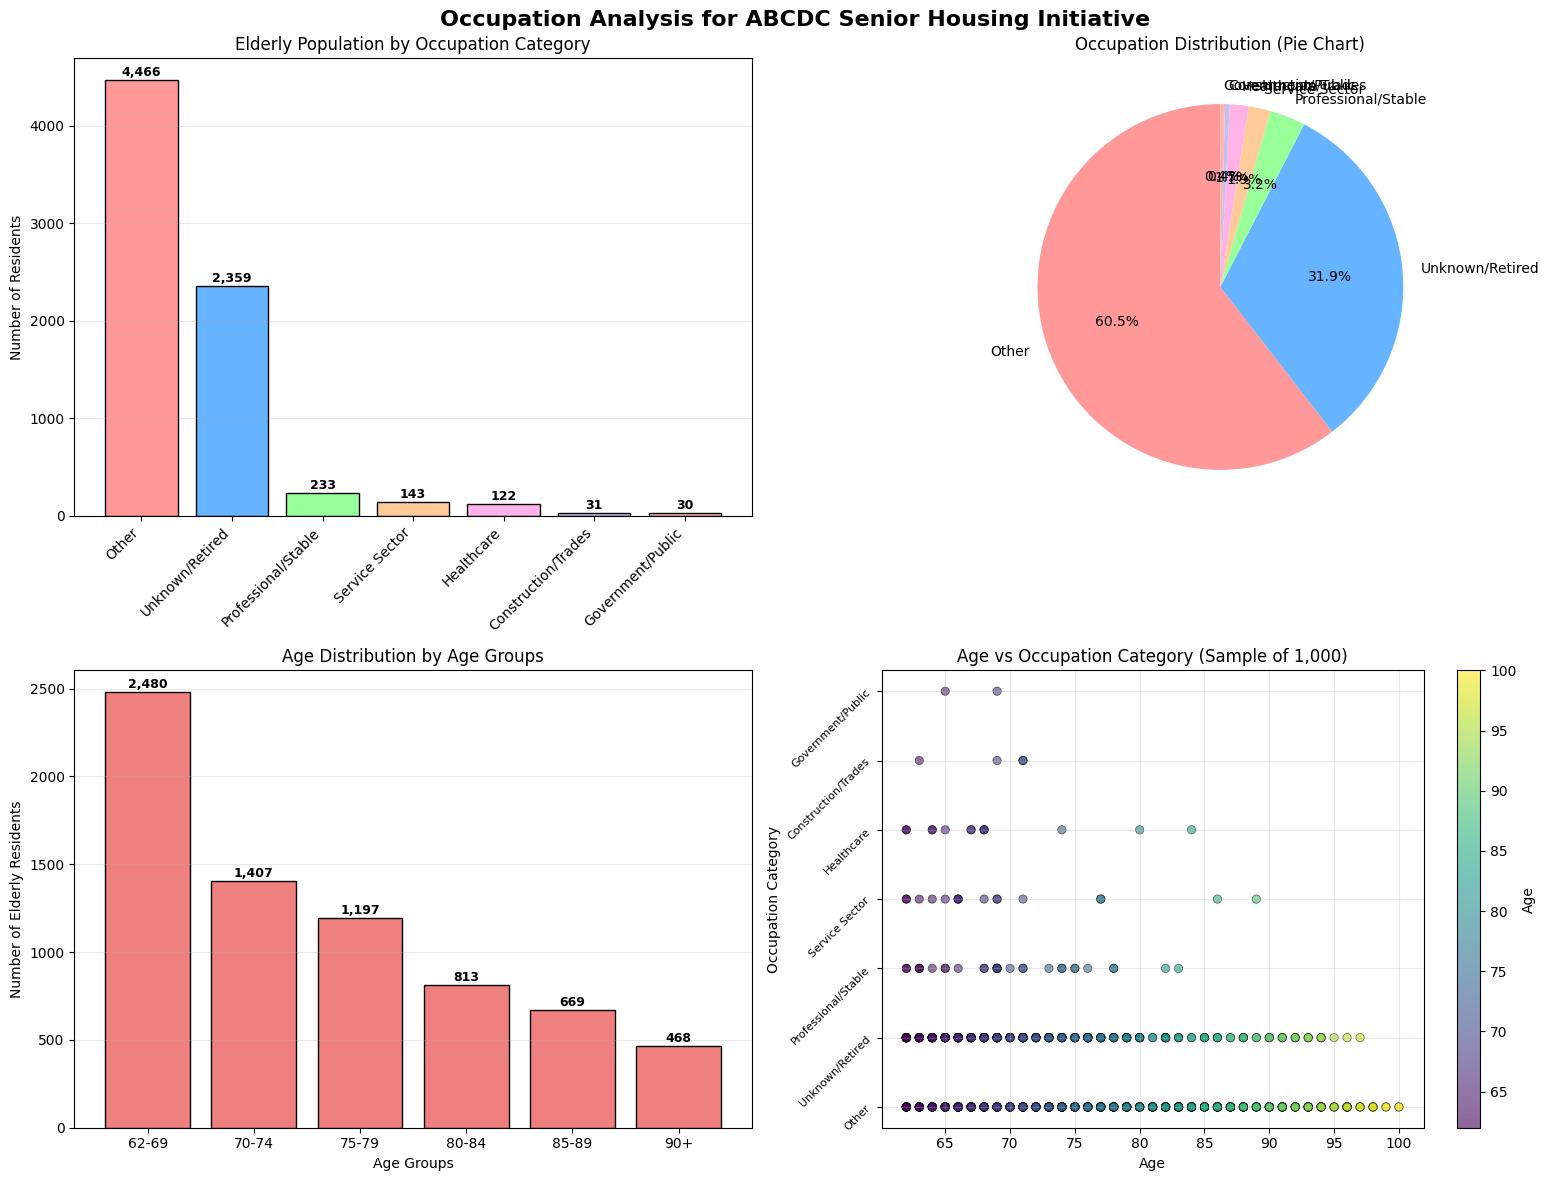


Occupation Analysis Insights:
• 233 elderly in professional/stable occupations
• 122 elderly in healthcare (potential service providers)
• 2,359 elderly with unknown/retired status
• 143 elderly in service sector occupations


In [17]:
# Occupation analysis visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Occupation Analysis for ABCDC Senior Housing Initiative', fontsize=16, fontweight='bold')

# 1. Occupation categories
occ_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0', '#ffb3b3']
bars1 = axes[0,0].bar(range(len(occupation_cat_analysis)), occupation_cat_analysis.values, color=occ_colors[:len(occupation_cat_analysis)], edgecolor='black')
axes[0,0].set_title('Elderly Population by Occupation Category')
axes[0,0].set_ylabel('Number of Residents')
axes[0,0].set_xticks(range(len(occupation_cat_analysis)))
axes[0,0].set_xticklabels(occupation_cat_analysis.index, rotation=45, ha='right')
axes[0,0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, count in zip(bars1, occupation_cat_analysis.values):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 10,
                   f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 2. Occupation pie chart
occ_labels = list(occupation_cat_analysis.index)
occ_counts = list(occupation_cat_analysis.values)
colors2 = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ffb3e6', '#c2c2f0', '#ffb3b3']

wedges, texts, autotexts = axes[0,1].pie(occ_counts, labels=occ_labels, autopct='%1.1f%%', 
                                          colors=colors2[:len(occ_counts)], startangle=90)
axes[0,1].set_title('Occupation Distribution (Pie Chart)')

# 3. Age distribution by age groups
age_bins = [62, 70, 75, 80, 85, 90, 100]
age_labels = ['62-69', '70-74', '75-79', '80-84', '85-89', '90+']
age_counts = pd.cut(df_elderly['Age'], bins=age_bins, labels=age_labels).value_counts().sort_index()

bars3 = axes[1,0].bar(age_labels, age_counts.values, color='lightcoral', edgecolor='black')
axes[1,0].set_title('Age Distribution by Age Groups')
axes[1,0].set_xlabel('Age Groups')
axes[1,0].set_ylabel('Number of Elderly Residents')
axes[1,0].grid(axis='y', alpha=0.3)

# Add value labels
for bar, count in zip(bars3, age_counts.values):
    height = bar.get_height()
    axes[1,0].text(bar.get_x() + bar.get_width()/2., height + 5,
                   f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=9)

# 4. Age vs Occupation scatter plot
sample_size = min(1000, len(df_elderly))  # Sample for better visualization
sample_df = df_elderly.sample(n=sample_size, random_state=42)

# Create numeric occupation categories for scatter plot
occ_mapping = {cat: i for i, cat in enumerate(occupation_cat_analysis.index)}
sample_df['Occ_Numeric'] = sample_df['Occupation_Category'].map(occ_mapping)

scatter = axes[1,1].scatter(sample_df['Age'], sample_df['Occ_Numeric'], 
                           alpha=0.6, c=sample_df['Age'], cmap='viridis', edgecolors='black', linewidth=0.5)
axes[1,1].set_title(f'Age vs Occupation Category (Sample of {sample_size:,})')
axes[1,1].set_xlabel('Age')
axes[1,1].set_ylabel('Occupation Category')
axes[1,1].set_yticks(range(len(occupation_cat_analysis)))
axes[1,1].set_yticklabels(occupation_cat_analysis.index, rotation=45, ha='right', fontsize=8)
axes[1,1].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[1,1])
cbar.set_label('Age')

plt.tight_layout()
plt.show()

print(f"\nOccupation Analysis Insights:")
print(f"• {occupation_cat_analysis.get('Professional/Stable', 0):,} elderly in professional/stable occupations")
print(f"• {occupation_cat_analysis.get('Healthcare', 0):,} elderly in healthcare (potential service providers)")
print(f"• {occupation_cat_analysis.get('Unknown/Retired', 0):,} elderly with unknown/retired status")
print(f"• {occupation_cat_analysis.get('Service Sector', 0):,} elderly in service sector occupations")


SUMMARY DASHBOARD FOR ABCDC


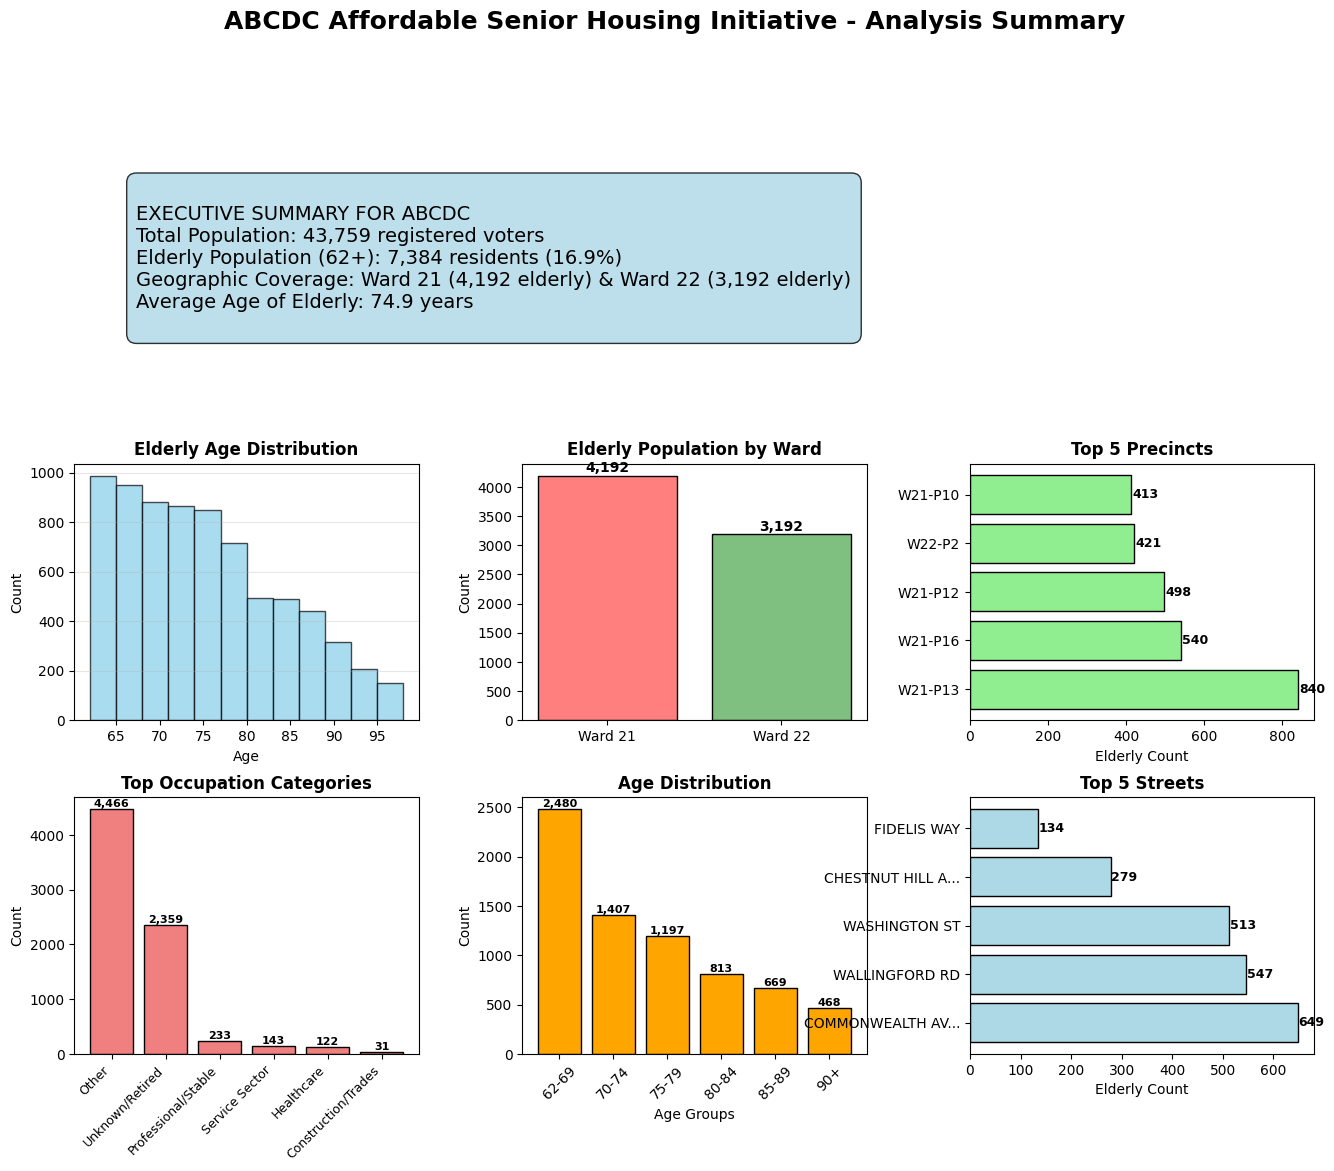

In [18]:
# SUMMARY DASHBOARD FOR ABCDC
print("SUMMARY DASHBOARD FOR ABCDC")
print("=" * 35)

# Create a summary dashboard
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Main title
fig.suptitle('ABCDC Affordable Senior Housing Initiative - Analysis Summary', 
             fontsize=18, fontweight='bold', y=0.98)

# 1. Executive Summary (Top row, spanning 3 columns)
ax_summary = fig.add_subplot(gs[0, :])
ax_summary.axis('off')

summary_text = f"""
EXECUTIVE SUMMARY FOR ABCDC
Total Population: {len(df_clean):,} registered voters
Elderly Population (62+): {len(df_elderly):,} residents ({len(df_elderly)/len(df_clean)*100:.1f}%)
Geographic Coverage: Ward 21 ({ward_counts[21]:,} elderly) & Ward 22 ({ward_counts[22]:,} elderly)
Average Age of Elderly: {df_elderly['Age'].mean():.1f} years
"""

ax_summary.text(0.05, 0.5, summary_text, fontsize=14, verticalalignment='center',
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

# 2. Age distribution (2nd row, 1st column)
ax_age = fig.add_subplot(gs[1, 0])
ax_age.hist(df_elderly['Age'], bins=range(62, 101, 3), edgecolor='black', alpha=0.7, color='skyblue')
ax_age.set_title('Elderly Age Distribution', fontweight='bold')
ax_age.set_xlabel('Age')
ax_age.set_ylabel('Count')
ax_age.grid(axis='y', alpha=0.3)

# 3. Ward comparison (2nd row, 2nd column)
ax_ward = fig.add_subplot(gs[1, 1])
ward_data = [ward_counts[21], ward_counts[22]]
ward_labels = ['Ward 21', 'Ward 22']
colors = ['#ff7f7f', '#7fbf7f']
bars = ax_ward.bar(ward_labels, ward_data, color=colors, edgecolor='black')
ax_ward.set_title('Elderly Population by Ward', fontweight='bold')
ax_ward.set_ylabel('Count')
for bar, count in zip(bars, ward_data):
    height = bar.get_height()
    ax_ward.text(bar.get_x() + bar.get_width()/2., height + 10,
                 f'{count:,}', ha='center', va='bottom', fontweight='bold')

# 4. Top precincts (2nd row, 3rd column)
ax_precinct = fig.add_subplot(gs[1, 2])
top_5_precincts = precinct_analysis.head(5)
precinct_labels = [f'W{w}-P{p}' for w, p in top_5_precincts.index]
bars = ax_precinct.barh(precinct_labels, top_5_precincts['Elderly_Count'], color='lightgreen', edgecolor='black')
ax_precinct.set_title('Top 5 Precincts', fontweight='bold')
ax_precinct.set_xlabel('Elderly Count')
for i, (bar, count) in enumerate(zip(bars, top_5_precincts['Elderly_Count'])):
    width = bar.get_width()
    ax_precinct.text(width + 2, bar.get_y() + bar.get_height()/2,
                     f'{count:.0f}', ha='left', va='center', fontweight='bold', fontsize=9)

# 5. Occupation categories (3rd row, 1st column)
ax_occ = fig.add_subplot(gs[2, 0])
occ_data = occupation_cat_analysis.head(6)  # Top 6 categories
bars = ax_occ.bar(range(len(occ_data)), occ_data.values, color='lightcoral', edgecolor='black')
ax_occ.set_title('Top Occupation Categories', fontweight='bold')
ax_occ.set_ylabel('Count')
ax_occ.set_xticks(range(len(occ_data)))
ax_occ.set_xticklabels(occ_data.index, rotation=45, ha='right', fontsize=9)
for bar, count in zip(bars, occ_data.values):
    height = bar.get_height()
    ax_occ.text(bar.get_x() + bar.get_width()/2., height + 5,
                f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 6. Age distribution (3rd row, 2nd column)
ax_age_dist = fig.add_subplot(gs[2, 1])
age_data = pd.cut(df_elderly['Age'], bins=[62, 70, 75, 80, 85, 90, 100], 
                  labels=['62-69', '70-74', '75-79', '80-84', '85-89', '90+']).value_counts().sort_index()
bars = ax_age_dist.bar(age_data.index, age_data.values, color='orange', edgecolor='black')
ax_age_dist.set_title('Age Distribution', fontweight='bold')
ax_age_dist.set_xlabel('Age Groups')
ax_age_dist.set_ylabel('Count')
ax_age_dist.tick_params(axis='x', rotation=45)
for bar, count in zip(bars, age_data.values):
    height = bar.get_height()
    ax_age_dist.text(bar.get_x() + bar.get_width()/2., height + 2,
                     f'{count:,}', ha='center', va='bottom', fontweight='bold', fontsize=8)

# 7. Top streets (3rd row, 3rd column)
ax_streets = fig.add_subplot(gs[2, 2])
top_5_streets = street_analysis.head(5)
street_labels = [street[:15] + '...' if len(street) > 15 else street 
                 for street in top_5_streets.index.get_level_values(0)]
bars = ax_streets.barh(street_labels, top_5_streets['Elderly_Count'], color='lightblue', edgecolor='black')
ax_streets.set_title('Top 5 Streets', fontweight='bold')
ax_streets.set_xlabel('Elderly Count')
for i, (bar, count) in enumerate(zip(bars, top_5_streets['Elderly_Count'])):
    width = bar.get_width()
    ax_streets.text(width + 1, bar.get_y() + bar.get_height()/2,
                    f'{count:.0f}', ha='left', va='center', fontweight='bold', fontsize=9)

plt.show()


In [19]:
# SUMMARY INSIGHTS FOR ABCDC
print("SUMMARY INSIGHTS FOR ABCDC")
print("=" * 35)

print(f"\nKEY FINDINGS:")
print(f"• Total elderly residents (62+): {len(df_elderly):,}")
print(f"• Ward 21: {ward_counts[21]:,} elderly residents")
print(f"• Ward 22: {ward_counts[22]:,} elderly residents")
print(f"• Average age: {df_elderly['Age'].mean():.1f} years")
print(f"• Professional/Stable occupations: {occupation_cat_analysis.get('Professional/Stable', 0):,}")
print(f"• Healthcare workers: {occupation_cat_analysis.get('Healthcare', 0):,}")
print(f"• Unknown/Retired: {occupation_cat_analysis.get('Unknown/Retired', 0):,}")

print(f"\nGEOGRAPHIC TARGETING:")
print(f"• Highest elderly density precinct: {density_labels[0]} with {precinct_density.iloc[0]}% elderly")
print(f"• Top street for elderly outreach: {street_analysis.index[0][0]} with {street_analysis.iloc[0]['Elderly_Count']:.0f} elderly residents")


SUMMARY INSIGHTS FOR ABCDC

KEY FINDINGS:
• Total elderly residents (62+): 7,384
• Ward 21: 4,192 elderly residents
• Ward 22: 3,192 elderly residents
• Average age: 74.9 years
• Professional/Stable occupations: 233
• Healthcare workers: 122
• Unknown/Retired: 2,359

GEOGRAPHIC TARGETING:
• Highest elderly density precinct: W21-P13 with 39.7% elderly
• Top street for elderly outreach: COMMONWEALTH AVE with 649 elderly residents
